In [ ]:
#!pip install --upgrade tensorflow==1.15

In [ ]:
from sklearn.datasets import load_digits
df = load_digits()

In [ ]:
#Mengecek berapa banyak image dan besar pixel pada data yang ingin dicek
print("Image Data Shape", df.data.shape)
print("Label Data Shape", df.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


Berdasarkan hasil diatas dapat dilihat bahwa dataset yang diambil memiliki 1797 gambar dengan dimensi 8x8 pixel dan memiliki 1797 label

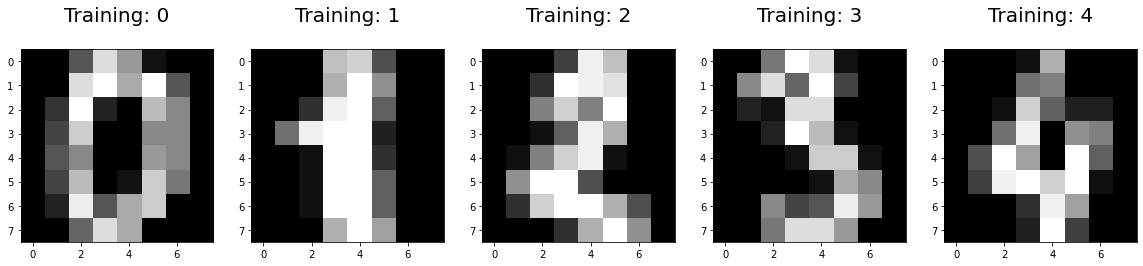

In [ ]:
#Mengecek bagaimana bentuk data yang ingin diambil dengan cara divisualisasikan atau di print
import numpy as np 
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(df.data[0:5], df.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
#Ini adalah bagian dimana dataset displit/dibagi menjadi 2 yaitu test set dan training set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.data, df.target, test_size=0.2, random_state=1)

Dari code diatas kita dapat lihat bahwa dataset dibagi 2 dengan rasio 80% training set dan 20% test set dan juga tidak ditambahkan parameter random_state yang berguna untuk mengambil data secara random dengan seed=1 dengan tujuan agar data yang di test dan training dapat tercampur/tervariasi dengan baik

In [ ]:
# Data yang sudah displit di masukkan kedalam function logistic regression
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression()

logisticReg.fit(x_train, y_train)
predictions = logisticReg.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
#Menentukan accuracy berdasarkan dari training yang dilakukan yang nantinya akan ditampilkan pada classification report
accuracy = logisticReg.score(x_test, y_test)

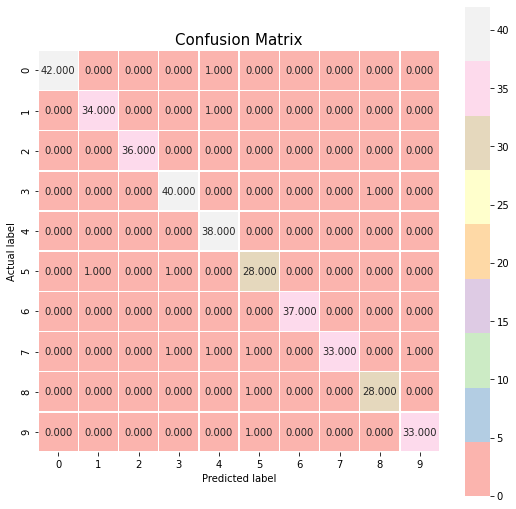

In [ ]:
#Membuat confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix'
plt.title(all_sample_title, size = 15);


Berdasarkan dari hasil matrix diatas dapat kita lihat bahwa pada kelas ke 3 dan 5 model program dapat memprediksi tanpa adanya kesalahan klasifikasi dimana pada kelas ke 3 model memprediksi benar sebanyak 36 kali dan pada kelas ke 5 model memprediksi benar sebanyak 38 kali, dan juga pada kelas ke 8 model masih banyak memiliki kesalahan prediksi dimana model salah memprediksi kelas 7 menjadi kelas 4 1 kali, kelas 7 menjadi kelas 5 1 kali, kelas 7 menjadi kelas 6 1 kali dan kelas 7 menjadi kelas 10 sebanyak 1 kali.

In [ ]:
print(f'{metrics.classification_report(y_test, predictions)}\n')

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.97      0.97      0.97        35
           2       1.00      1.00      1.00        36
           3       0.95      0.98      0.96        41
           4       0.93      1.00      0.96        38
           5       0.90      0.93      0.92        30
           6       1.00      1.00      1.00        37
           7       1.00      0.89      0.94        37
           8       0.97      0.97      0.97        29
           9       0.97      0.97      0.97        34

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360


